# EDA Muesli Company

### Business case
A Muesli distribution company has approached you to help them understand their delivery process. They want to develop KPIs to help them keep track of the health of their business in order to improve the service they offer their customers.

### Workflow
maybe add more whitespace on the edges and a internal/external heading on the side
![workflow](images/Muesli_Flow.drawio.png)
![workflow](./images/workflow.png)

In [2]:
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

## Orders-Dataset

In [4]:
# read in csv file and display first 5 rows of #!CAMPAIGN DATA
df_orders = pd.read_csv("data/Group_1_Muesli_Project_raw_data-Orders.csv")
df_orders.rename(columns=lambda x : x.lower(), inplace=True)
df_orders.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
df_orders.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15


In [5]:
# check which columns are included in our dataframe
df_orders.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [6]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_orders.shape

(9994, 19)

In [7]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   order_date      9994 non-null   object 
 3   ship_mode       9994 non-null   object 
 4   customer_id     9994 non-null   object 
 5   customer_name   9994 non-null   object 
 6   origin_channel  9994 non-null   object 
 7   country/region  9994 non-null   object 
 8   city            9994 non-null   object 
 9   state           9994 non-null   object 
 10  postal_code     9983 non-null   float64
 11  region          9994 non-null   object 
 12  category        9994 non-null   object 
 13  sub-category    9994 non-null   object 
 14  product_id      9994 non-null   object 
 15  sales           9994 non-null   float64
 16  quantity        9994 non-null   int64  
 17  discount        9994 non-null   f

In [8]:
# drop columns we don't need
df_orders.drop(["index","customer_name", "origin_channel", "country/region", "city", "state", "postal_code", "region", "category", "sub-category", "product_id", "sales", "quantity", "discount", "profit"], axis=1, inplace=True)
df_orders.head()

,order_id,order_date,ship_mode,customer_id
0,CA-2019-121755,16/1/2019,Second Class,EH-13945
1,CA-2019-118255,11/3/2019,First Class,ON-18715
2,CA-2019-169194,20/6/2019,Standard Class,LH-16900
3,CA-2019-111682,17/6/2019,First Class,TB-21055
4,CA-2018-135545,24/11/2018,Standard Class,KM-16720


In [9]:
# check for duplicate rows in video_id column
df_orders["order_id"].duplicated().value_counts()
# There are many duplicates because orders contain multiple items
# Since we are only looking at logistic aspects, we are going to drop the duplicates
df_orders.drop_duplicates(inplace=True)


## Campaign-Dataset

In [10]:
# read in csv file and display first 5 rows of #!CAMPAIGN DATA
df_camp = pd.read_csv("data/Group_1_Muesli_Project_raw_data-Campaign_Data.csv")
df_camp.rename(columns=lambda x : x.lower(), inplace=True)
df_camp.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
df_camp.drop(["customer_name"], axis = 1, inplace=True)
df_camp.head()

,order_id,arrival_scan_date
0,CA-2019-109666,03/05/2019
1,CA-2019-138933,03/05/2019
2,CA-2019-130001,03/05/2019
3,CA-2019-113061,06/05/2019
4,CA-2019-162138,06/05/2019


In [11]:
# check which columns are included in our dataframe
df_camp.columns

Index(['order_id', 'arrival_scan_date'], dtype='object')

In [12]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_camp.shape

(333, 2)

In [13]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_id           333 non-null    object
 1   arrival_scan_date  333 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB


In [14]:
# check for duplicate rows in video_id column
df_camp["order_id"].duplicated().value_counts()
# No duplicates

False    333
Name: order_id, dtype: int64

## Process-Dataset

In [15]:
# read in csv file and display first 5 rows of #!PROCESS
df_process = pd.read_csv("data/Group_1_Muesli_Project_raw_data-Order_Process_Data.csv")
df_process.rename(columns=lambda x : x.lower(), inplace=True)
df_process.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
df_process.drop(["row_id"], axis = 1, inplace=True)

df_process.head()

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,3/1/2019,07/01/2019,Express
1,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


In [28]:
# check which columns are included in our dataframe
df_process.columns

Index(['order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

In [29]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_process.shape

(3004, 4)

In [30]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 0 to 5898
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            3004 non-null   object
 1   order_date          3004 non-null   object
 2   on_truck_scan_date  3004 non-null   object
 3   ship_mode           3004 non-null   object
dtypes: object(4)
memory usage: 117.3+ KB


In [19]:
# check for duplicate rows in video_id column
df_process["order_id"].duplicated().value_counts()
# There are many duplicates because orders contain multiple items
# Since we are only looking at logistic aspects, we are going to drop the duplicates
# Assumption: All products of one order are being processed and shipped together
#TODO proof if assumption is correct
df_process.drop_duplicates(inplace=True)
df_process["order_id"].duplicated().value_counts()
#TODO Why are there still two duplicates and how do we check them?


False    3002
True        2
Name: order_id, dtype: int64

## Intern Data Study

In [20]:
# read in csv file and display first 5 rows of #!INTERN DATA STUDY
df_intern = pd.read_csv("data/Group_1_Muesli_Project_raw_data-Intern_Data_Study.csv")
df_intern.rename(columns=lambda x : x.lower(), inplace=True)
df_intern.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
df_intern.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019


In [21]:
# check which columns are included in our dataframe
df_intern.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [22]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_intern.shape

(290, 3)

In [31]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_intern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            204 non-null    object
 1   ready_to_ship_date  204 non-null    object
 2   pickup_date         204 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


In [24]:
# check for duplicate rows in video_id column
df_intern["order_id"].duplicated().value_counts()
# Customer scanned multiple times -> drop duplicates
df_intern.drop_duplicates(inplace=True)

In [25]:
# Merge datasets
#TODO merge, outliers, dates (to have weekdays), define KPIs

In [26]:
# Merge Order with Campaign
order_camp_dataset = pd.merge(df_orders, df_camp, on="order_id", how="outer")

order_camp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 5008
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_id           5009 non-null   object
 1   order_date         5009 non-null   object
 2   ship_mode          5009 non-null   object
 3   customer_id        5009 non-null   object
 4   arrival_scan_date  333 non-null    object
dtypes: object(5)
memory usage: 234.8+ KB


In [27]:
process_intern_dataset = pd.merge(df_intern, df_process, on="order_id", how="outer")
display(process_intern_dataset.info())
display(process_intern_dataset.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 0 to 3003
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            3004 non-null   object
 1   ready_to_ship_date  204 non-null    object
 2   pickup_date         204 non-null    object
 3   order_date          3004 non-null   object
 4   on_truck_scan_date  3004 non-null   object
 5   ship_mode           3004 non-null   object
dtypes: object(6)
memory usage: 164.3+ KB


None

,order_id,ready_to_ship_date,pickup_date,order_date,on_truck_scan_date,ship_mode
0,CA-2019-116540,02/09/2019,03/09/2019,2/9/2019,03/09/2019,Express
1,CA-2019-129847,04/09/2019,04/09/2019,2/9/2019,04/09/2019,Express
2,CA-2019-129630,04/09/2019,04/09/2019,4/9/2019,04/09/2019,Express
3,CA-2019-106278,05/09/2019,06/09/2019,2/9/2019,06/09/2019,Standard Processing
4,CA-2019-158099,05/09/2019,06/09/2019,3/9/2019,06/09/2019,Express


In [71]:
final_dataset = pd.merge(order_camp_dataset, process_intern_dataset, on="order_id", how="outer")
display(final_dataset.info())
final_dataset[["on_truck_scan_date", "pickup_date"]]
#final_dataset["order_id"].duplicated().value_counts()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5010
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            5011 non-null   object
 1   order_date_x        5011 non-null   object
 2   ship_mode_x         5011 non-null   object
 3   customer_id         5011 non-null   object
 4   arrival_scan_date   333 non-null    object
 5   ready_to_ship_date  204 non-null    object
 6   pickup_date         204 non-null    object
 7   order_date_y        3004 non-null   object
 8   on_truck_scan_date  3004 non-null   object
 9   ship_mode_y         3004 non-null   object
dtypes: object(10)
memory usage: 430.6+ KB


None

,on_truck_scan_date,pickup_date
0,23/01/2019,NaN
1,13/03/2019,NaN
2,26/06/2019,NaN
3,19/06/2019,NaN
4,NaN,NaN
...,...,...
5006,06/11/2019,NaN
5007,NaN,NaN
5008,05/08/2020,NaN
5009,24/07/2020,NaN


In [72]:
final_dataset.head()

,order_id,order_date_x,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,order_date_y,on_truck_scan_date,ship_mode_y
0,CA-2019-121755,16/1/2019,Second Class,EH-13945,NaN,NaN,NaN,16/1/2019,23/01/2019,Standard Processing
1,CA-2019-118255,11/3/2019,First Class,ON-18715,NaN,NaN,NaN,11/3/2019,13/03/2019,Express
2,CA-2019-169194,20/6/2019,Standard Class,LH-16900,NaN,NaN,NaN,20/6/2019,26/06/2019,Standard Processing
3,CA-2019-111682,17/6/2019,First Class,TB-21055,NaN,NaN,NaN,17/6/2019,19/06/2019,Express
4,CA-2018-135545,24/11/2018,Standard Class,KM-16720,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
final_dataset['order_date_x'] = pd.to_datetime(final_dataset['order_date_x'], format='%d/%m/%Y')
final_dataset['order_date_y'] = pd.to_datetime(final_dataset['order_date_y'], format='%d/%m/%Y')
final_dataset['arrival_scan_date'] = pd.to_datetime(final_dataset['arrival_scan_date'], format='%d/%m/%Y')
final_dataset['ready_to_ship_date'] = pd.to_datetime(final_dataset['ready_to_ship_date'], format='%d/%m/%Y')
final_dataset['pickup_date'] = pd.to_datetime(final_dataset['pickup_date'], format='%d/%m/%Y')
final_dataset['on_truck_scan_date'] = pd.to_datetime(final_dataset['on_truck_scan_date'], format='%d/%m/%Y')
final_dataset.head()

,order_id,order_date_x,ship_mode_x,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,order_date_y,on_truck_scan_date,ship_mode_y
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,NaT,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
1,CA-2019-118255,2019-03-11,First Class,ON-18715,NaT,NaT,NaT,2019-03-11,2019-03-13,Express
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,NaT,NaT,NaT,2019-06-20,2019-06-26,Standard Processing
3,CA-2019-111682,2019-06-17,First Class,TB-21055,NaT,NaT,NaT,2019-06-17,2019-06-19,Express
4,CA-2018-135545,2018-11-24,Standard Class,KM-16720,NaT,NaT,NaT,NaT,NaT,NaN


In [75]:
#Check if the two order date columns are the same
final_dataset["delta_order_date"] = final_dataset["order_date_x"] - final_dataset["order_date_y"]
final_dataset.delta_order_date.describe()
# Yes, they are -> 0 days time difference for all entries
# drop one order date column
final_dataset.drop(["order_date_y", "delta_order_date", "ship_mode_x"], axis=1, inplace=True)
# rename column
final_dataset.rename(columns={"order_date_x": "order_date"}, inplace=True)

# show dataset
final_dataset.head()


,order_id,order_date,customer_id,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,ship_mode_y
0,CA-2019-121755,2019-01-16,EH-13945,NaT,NaT,NaT,2019-01-23,Standard Processing
1,CA-2019-118255,2019-03-11,ON-18715,NaT,NaT,NaT,2019-03-13,Express
2,CA-2019-169194,2019-06-20,LH-16900,NaT,NaT,NaT,2019-06-26,Standard Processing
3,CA-2019-111682,2019-06-17,TB-21055,NaT,NaT,NaT,2019-06-19,Express
4,CA-2018-135545,2018-11-24,KM-16720,NaT,NaT,NaT,NaT,NaN


In [83]:
# Calculate actual day in process phases
final_dataset["order_to_arrival"] = (final_dataset["arrival_scan_date"] - final_dataset["order_date"]).dt.days
final_dataset.order_to_arrival.describe()

count   333.00
mean     10.83
std       2.86
min       3.00
25%       9.00
50%      11.00
75%      13.00
max      17.00
Name: order_to_arrival, dtype: float64

In [88]:
final_dataset.query("order_to_arrival > 14").count()
# 26 order of 333 existing entries take
# 

order_id              26
order_date            26
customer_id           26
arrival_scan_date     26
ready_to_ship_date     0
pickup_date            0
on_truck_scan_date    26
ship_mode_y           26
order_to_arrival      26
dtype: int64

<AxesSubplot:>

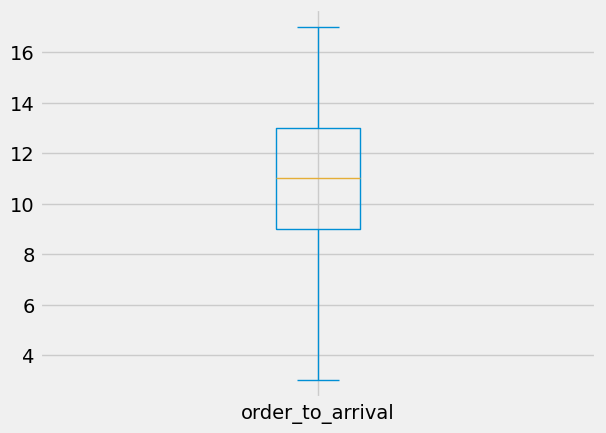

In [85]:
final_dataset.plot(kind="box")